In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#### Carregando o vocabulário

In [2]:
import json

with open('./resumo/vocab.json', 'r') as infile:
    vocab = json.load(infile)

vocabSize = len(vocab['idx'])

print('Vocabulary size:', vocabSize)

Vocabulary size: 15170


### Configurações e Hiperparâmetros

In [3]:
import torch
import torch.nn as nn
from data import get_loaders
from train import train, test, check_input
from matplotlib import pyplot as plt

In [4]:
classes = [
  'negative',
  'somewhat negative',
  'neutral',
  'somewhat positive',
  'positive'
]

In [5]:
def plot_instance(instance_id):
    text = train_loader.dataset.texts[instance_id]
    label = train_loader.dataset.labels[instance_id]
    label_str = classes[train_loader.dataset.labels[instance_id]]
    print('\nExample:')
    print(text)
    print('Label:', label, '-', label_str)

In [6]:
data_path = './resumo/'
device_name = 'cuda'
batch_size = 128
nb_epochs = 50
log_interval = 5
lr = 1e-3
lr_step = 10
num_layers = 3
dropout = .02

In [7]:
device = torch.device(device_name)

train_loader, valid_loader = get_loaders(
    data_path=data_path, 
    batch_size=batch_size, 
    splits=['train', 'valid'],
)

nb_words = len(train_loader.dataset.vocab)

print(
    'Train size: ', 
    len(train_loader.dataset.texts),
    len(train_loader.dataset.labels)
)
print(
    'Valid size: ', 
    len(valid_loader.dataset.texts),
    len(valid_loader.dataset.labels)
)

plot_instance(0)
plot_instance(1015)
plot_instance(2136)
plot_instance(4974)


Train size:  5458 5458
Valid size:  1365 1365

Example:
In Moonlight Mile , no one gets shut out of the hug cycle .
Label: 2 - neutral

Example:
Analyze That regurgitates and waters down many of the previous film 's successes , with a few new swings thrown in .
Label: 2 - neutral

Example:
A moving picture that does not move .
Label: 1 - somewhat negative

Example:
Oversexed , at times overwrought comedy\/drama that offers little insight into the experience of being forty , female and single .
Label: 0 - negative


In [8]:
def average_pooling(instances, lens):
    return torch.stack([
        text[:l].mean(0) for text, l in zip(instances, lens)
    ])


class TextLSTM(nn.Module):
    def __init__(self, num_embeddings=vocabSize, embedding_dim=100):
        '''
            num_embeddings: number of words in the dictionary
            embedding_dim: size of the word-embedding vector
        '''
        super(TextLSTM, self).__init__()
        self.embedding = nn.Embedding(
            num_embeddings=num_embeddings, 
            embedding_dim=embedding_dim,
        )
        self.rnn = nn.LSTM(
            input_size=100, hidden_size=32, 
            batch_first=True, bidirectional=True,
            num_layers=num_layers, dropout = dropout
        )
        self.fc1 = nn.Linear(32*2, 32*2)
        self.fc2 = nn.Linear(32*2, len(classes))
        
    def forward(self, x, lengths):
        # Transforma índices das palavras em vetores 
        x = self.embedding(x)
        # Processa vetores das palavras com uma rede recorrente
        hidden, output = self.rnn(x)
        # Faz a média das ativações de todas as iterações recorrentes
        vector = average_pooling(hidden, lengths)
        # Camada linear para classificacao
        x = self.fc1(vector)
        x = self.fc2(x)
        return x


In [9]:
model = TextLSTM()
model = model.to(device)

dummy_pred = check_input(model, device)

Passed


In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_step)

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luciano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Treino


* * * Training * * *
Train Epoch:   1 [     0/  5458 (0%)]	Loss: 1.593680
Train Epoch:   1 [   640/  5458 (12%)]	Loss: 1.592130
Train Epoch:   1 [  1280/  5458 (23%)]	Loss: 1.558165
Train Epoch:   1 [  1920/  5458 (35%)]	Loss: 1.526587
Train Epoch:   1 [  2560/  5458 (47%)]	Loss: 1.595988
Train Epoch:   1 [  3200/  5458 (58%)]	Loss: 1.613407
Train Epoch:   1 [  3840/  5458 (70%)]	Loss: 1.600767
Train Epoch:   1 [  4480/  5458 (81%)]	Loss: 1.570529
Train Epoch:   1 [  5120/  5458 (93%)]	Loss: 1.534596

* * * Evaluating * * *
Test set: Average loss: 0.0126, Accuracy: 352/1365 (25.79%)



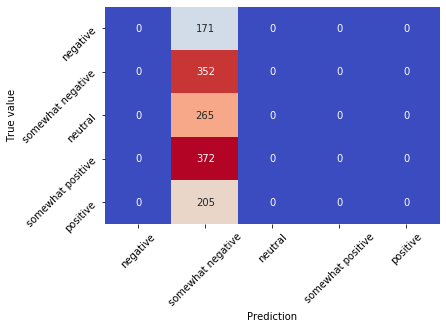


* * * Training * * *
Train Epoch:   2 [     0/  5458 (0%)]	Loss: 1.536841
Train Epoch:   2 [   640/  5458 (12%)]	Loss: 1.561492
Train Epoch:   2 [  1280/  5458 (23%)]	Loss: 1.540722
Train Epoch:   2 [  1920/  5458 (35%)]	Loss: 1.545831
Train Epoch:   2 [  2560/  5458 (47%)]	Loss: 1.578611
Train Epoch:   2 [  3200/  5458 (58%)]	Loss: 1.558779
Train Epoch:   2 [  3840/  5458 (70%)]	Loss: 1.572420
Train Epoch:   2 [  4480/  5458 (81%)]	Loss: 1.553096
Train Epoch:   2 [  5120/  5458 (93%)]	Loss: 1.582199

* * * Evaluating * * *
Test set: Average loss: 0.0125, Accuracy: 403/1365 (29.52%)



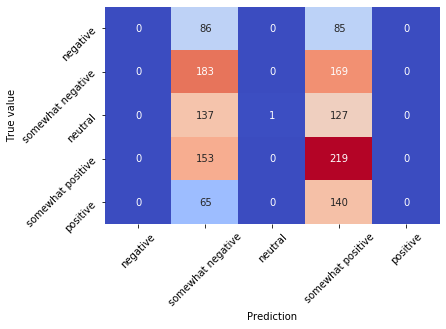


* * * Training * * *
Train Epoch:   3 [     0/  5458 (0%)]	Loss: 1.521087
Train Epoch:   3 [   640/  5458 (12%)]	Loss: 1.537144
Train Epoch:   3 [  1280/  5458 (23%)]	Loss: 1.533721
Train Epoch:   3 [  1920/  5458 (35%)]	Loss: 1.512470
Train Epoch:   3 [  2560/  5458 (47%)]	Loss: 1.488075
Train Epoch:   3 [  3200/  5458 (58%)]	Loss: 1.422792
Train Epoch:   3 [  3840/  5458 (70%)]	Loss: 1.507310
Train Epoch:   3 [  4480/  5458 (81%)]	Loss: 1.547576
Train Epoch:   3 [  5120/  5458 (93%)]	Loss: 1.508886

* * * Evaluating * * *
Test set: Average loss: 0.0122, Accuracy: 451/1365 (33.04%)



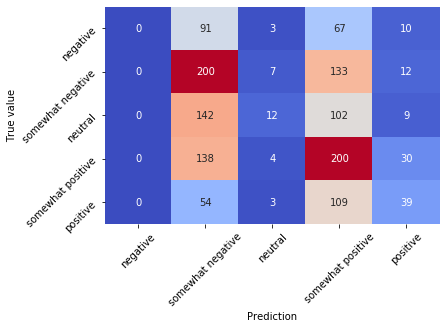


* * * Training * * *
Train Epoch:   4 [     0/  5458 (0%)]	Loss: 1.476827
Train Epoch:   4 [   640/  5458 (12%)]	Loss: 1.402345
Train Epoch:   4 [  1280/  5458 (23%)]	Loss: 1.440533
Train Epoch:   4 [  1920/  5458 (35%)]	Loss: 1.382033
Train Epoch:   4 [  2560/  5458 (47%)]	Loss: 1.379486
Train Epoch:   4 [  3200/  5458 (58%)]	Loss: 1.400461
Train Epoch:   4 [  3840/  5458 (70%)]	Loss: 1.423831
Train Epoch:   4 [  4480/  5458 (81%)]	Loss: 1.334153
Train Epoch:   4 [  5120/  5458 (93%)]	Loss: 1.449033

* * * Evaluating * * *
Test set: Average loss: 0.0122, Accuracy: 449/1365 (32.89%)



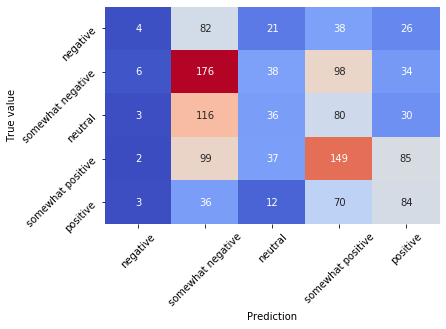


* * * Training * * *
Train Epoch:   5 [     0/  5458 (0%)]	Loss: 1.190716
Train Epoch:   5 [   640/  5458 (12%)]	Loss: 1.305175
Train Epoch:   5 [  1280/  5458 (23%)]	Loss: 1.272090
Train Epoch:   5 [  1920/  5458 (35%)]	Loss: 1.205661
Train Epoch:   5 [  2560/  5458 (47%)]	Loss: 1.270663
Train Epoch:   5 [  3200/  5458 (58%)]	Loss: 1.219722
Train Epoch:   5 [  3840/  5458 (70%)]	Loss: 1.250182
Train Epoch:   5 [  4480/  5458 (81%)]	Loss: 1.273838
Train Epoch:   5 [  5120/  5458 (93%)]	Loss: 1.291333

* * * Evaluating * * *
Test set: Average loss: 0.0127, Accuracy: 470/1365 (34.43%)



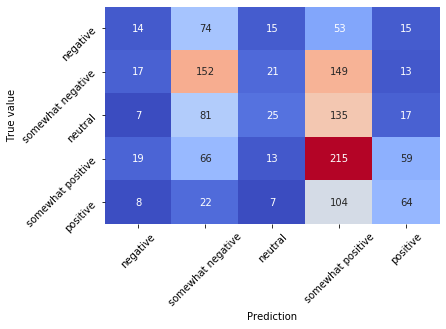


* * * Training * * *
Train Epoch:   6 [     0/  5458 (0%)]	Loss: 1.137820
Train Epoch:   6 [   640/  5458 (12%)]	Loss: 1.130943
Train Epoch:   6 [  1280/  5458 (23%)]	Loss: 1.120938
Train Epoch:   6 [  1920/  5458 (35%)]	Loss: 1.057430
Train Epoch:   6 [  2560/  5458 (47%)]	Loss: 0.982479
Train Epoch:   6 [  3200/  5458 (58%)]	Loss: 1.020967
Train Epoch:   6 [  3840/  5458 (70%)]	Loss: 0.995835
Train Epoch:   6 [  4480/  5458 (81%)]	Loss: 0.955047
Train Epoch:   6 [  5120/  5458 (93%)]	Loss: 1.072632

* * * Evaluating * * *
Test set: Average loss: 0.0133, Accuracy: 481/1365 (35.24%)



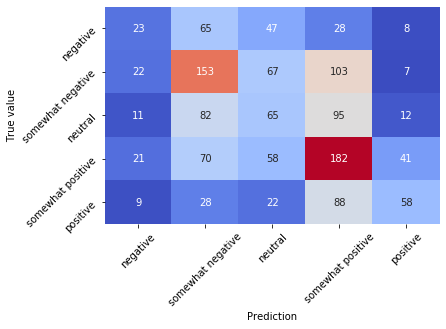


* * * Training * * *
Train Epoch:   7 [     0/  5458 (0%)]	Loss: 0.902745
Train Epoch:   7 [   640/  5458 (12%)]	Loss: 0.924128
Train Epoch:   7 [  1280/  5458 (23%)]	Loss: 0.866728
Train Epoch:   7 [  1920/  5458 (35%)]	Loss: 0.873084
Train Epoch:   7 [  2560/  5458 (47%)]	Loss: 0.786829
Train Epoch:   7 [  3200/  5458 (58%)]	Loss: 0.891156
Train Epoch:   7 [  3840/  5458 (70%)]	Loss: 0.836273
Train Epoch:   7 [  4480/  5458 (81%)]	Loss: 0.752409
Train Epoch:   7 [  5120/  5458 (93%)]	Loss: 1.002924

* * * Evaluating * * *
Test set: Average loss: 0.0153, Accuracy: 448/1365 (32.82%)



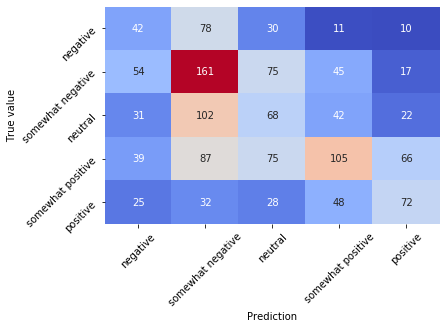


* * * Training * * *
Train Epoch:   8 [     0/  5458 (0%)]	Loss: 0.731472
Train Epoch:   8 [   640/  5458 (12%)]	Loss: 0.660791
Train Epoch:   8 [  1280/  5458 (23%)]	Loss: 0.848365
Train Epoch:   8 [  1920/  5458 (35%)]	Loss: 0.785055
Train Epoch:   8 [  2560/  5458 (47%)]	Loss: 0.669039
Train Epoch:   8 [  3200/  5458 (58%)]	Loss: 0.711518
Train Epoch:   8 [  3840/  5458 (70%)]	Loss: 0.764786
Train Epoch:   8 [  4480/  5458 (81%)]	Loss: 0.554797
Train Epoch:   8 [  5120/  5458 (93%)]	Loss: 0.689874

* * * Evaluating * * *
Test set: Average loss: 0.0172, Accuracy: 473/1365 (34.65%)



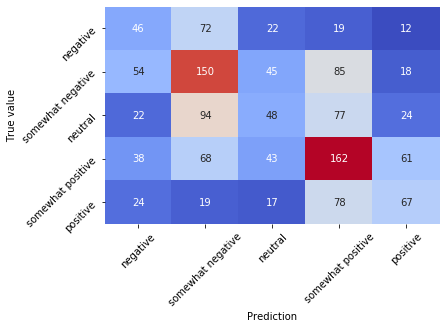


* * * Training * * *
Train Epoch:   9 [     0/  5458 (0%)]	Loss: 0.712129
Train Epoch:   9 [   640/  5458 (12%)]	Loss: 0.569809
Train Epoch:   9 [  1280/  5458 (23%)]	Loss: 0.643735
Train Epoch:   9 [  1920/  5458 (35%)]	Loss: 0.465733
Train Epoch:   9 [  2560/  5458 (47%)]	Loss: 0.542909
Train Epoch:   9 [  3200/  5458 (58%)]	Loss: 0.494493
Train Epoch:   9 [  3840/  5458 (70%)]	Loss: 0.561313
Train Epoch:   9 [  4480/  5458 (81%)]	Loss: 0.507577
Train Epoch:   9 [  5120/  5458 (93%)]	Loss: 0.560716

* * * Evaluating * * *
Test set: Average loss: 0.0187, Accuracy: 452/1365 (33.11%)



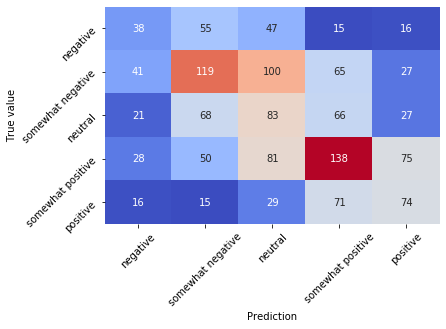


* * * Training * * *
Train Epoch:  10 [     0/  5458 (0%)]	Loss: 0.412594
Train Epoch:  10 [   640/  5458 (12%)]	Loss: 0.513645
Train Epoch:  10 [  1280/  5458 (23%)]	Loss: 0.617351
Train Epoch:  10 [  1920/  5458 (35%)]	Loss: 0.479170
Train Epoch:  10 [  2560/  5458 (47%)]	Loss: 0.539880
Train Epoch:  10 [  3200/  5458 (58%)]	Loss: 0.522211
Train Epoch:  10 [  3840/  5458 (70%)]	Loss: 0.596228
Train Epoch:  10 [  4480/  5458 (81%)]	Loss: 0.543593
Train Epoch:  10 [  5120/  5458 (93%)]	Loss: 0.557997

* * * Evaluating * * *
Test set: Average loss: 0.0205, Accuracy: 467/1365 (34.21%)



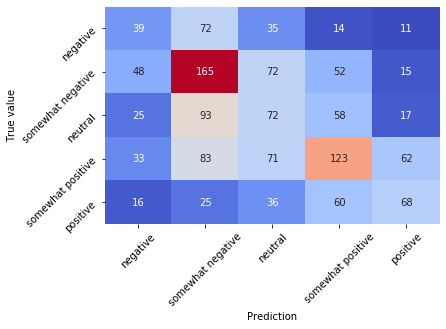


* * * Training * * *
Train Epoch:  11 [     0/  5458 (0%)]	Loss: 0.548043
Train Epoch:  11 [   640/  5458 (12%)]	Loss: 0.384930
Train Epoch:  11 [  1280/  5458 (23%)]	Loss: 0.268614
Train Epoch:  11 [  1920/  5458 (35%)]	Loss: 0.332718
Train Epoch:  11 [  2560/  5458 (47%)]	Loss: 0.316237
Train Epoch:  11 [  3200/  5458 (58%)]	Loss: 0.334205
Train Epoch:  11 [  3840/  5458 (70%)]	Loss: 0.422125
Train Epoch:  11 [  4480/  5458 (81%)]	Loss: 0.366906
Train Epoch:  11 [  5120/  5458 (93%)]	Loss: 0.317759

* * * Evaluating * * *
Test set: Average loss: 0.0215, Accuracy: 439/1365 (32.16%)



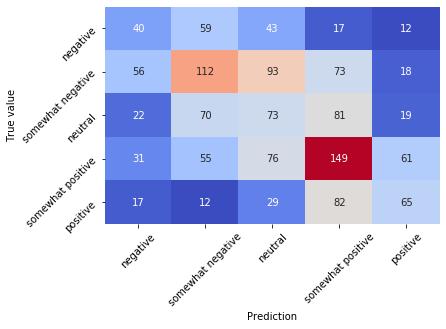


* * * Training * * *
Train Epoch:  12 [     0/  5458 (0%)]	Loss: 0.324480
Train Epoch:  12 [   640/  5458 (12%)]	Loss: 0.304928
Train Epoch:  12 [  1280/  5458 (23%)]	Loss: 0.341149
Train Epoch:  12 [  1920/  5458 (35%)]	Loss: 0.237730
Train Epoch:  12 [  2560/  5458 (47%)]	Loss: 0.253097
Train Epoch:  12 [  3200/  5458 (58%)]	Loss: 0.258920
Train Epoch:  12 [  3840/  5458 (70%)]	Loss: 0.322420
Train Epoch:  12 [  4480/  5458 (81%)]	Loss: 0.275996
Train Epoch:  12 [  5120/  5458 (93%)]	Loss: 0.346193

* * * Evaluating * * *
Test set: Average loss: 0.0227, Accuracy: 444/1365 (32.53%)



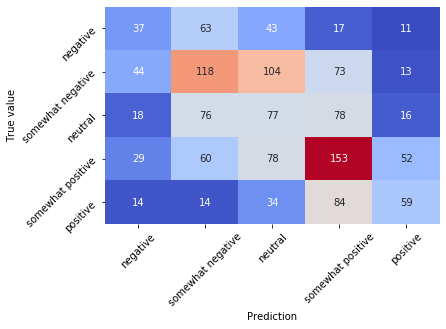


* * * Training * * *
Train Epoch:  13 [     0/  5458 (0%)]	Loss: 0.400281
Train Epoch:  13 [   640/  5458 (12%)]	Loss: 0.285289
Train Epoch:  13 [  1280/  5458 (23%)]	Loss: 0.247558
Train Epoch:  13 [  1920/  5458 (35%)]	Loss: 0.234971
Train Epoch:  13 [  2560/  5458 (47%)]	Loss: 0.296144
Train Epoch:  13 [  3200/  5458 (58%)]	Loss: 0.248731
Train Epoch:  13 [  3840/  5458 (70%)]	Loss: 0.261545
Train Epoch:  13 [  4480/  5458 (81%)]	Loss: 0.279018
Train Epoch:  13 [  5120/  5458 (93%)]	Loss: 0.295930

* * * Evaluating * * *
Test set: Average loss: 0.0239, Accuracy: 449/1365 (32.89%)



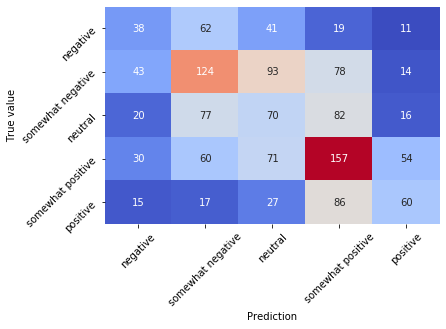


* * * Training * * *
Train Epoch:  14 [     0/  5458 (0%)]	Loss: 0.426208
Train Epoch:  14 [   640/  5458 (12%)]	Loss: 0.207326
Train Epoch:  14 [  1280/  5458 (23%)]	Loss: 0.286799
Train Epoch:  14 [  1920/  5458 (35%)]	Loss: 0.305420
Train Epoch:  14 [  2560/  5458 (47%)]	Loss: 0.275274
Train Epoch:  14 [  3200/  5458 (58%)]	Loss: 0.183861
Train Epoch:  14 [  3840/  5458 (70%)]	Loss: 0.281193
Train Epoch:  14 [  4480/  5458 (81%)]	Loss: 0.303954
Train Epoch:  14 [  5120/  5458 (93%)]	Loss: 0.244216

* * * Evaluating * * *
Test set: Average loss: 0.0247, Accuracy: 456/1365 (33.41%)



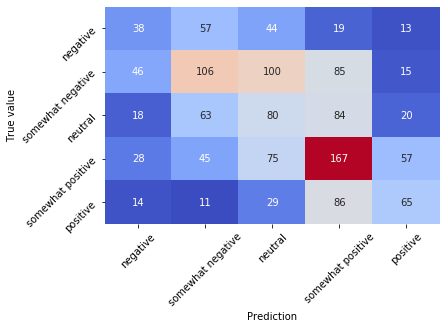


* * * Training * * *
Train Epoch:  15 [     0/  5458 (0%)]	Loss: 0.318479
Train Epoch:  15 [   640/  5458 (12%)]	Loss: 0.232396
Train Epoch:  15 [  1280/  5458 (23%)]	Loss: 0.248977
Train Epoch:  15 [  1920/  5458 (35%)]	Loss: 0.298779
Train Epoch:  15 [  2560/  5458 (47%)]	Loss: 0.271355
Train Epoch:  15 [  3200/  5458 (58%)]	Loss: 0.235088
Train Epoch:  15 [  3840/  5458 (70%)]	Loss: 0.208080
Train Epoch:  15 [  4480/  5458 (81%)]	Loss: 0.254318
Train Epoch:  15 [  5120/  5458 (93%)]	Loss: 0.270647

* * * Evaluating * * *
Test set: Average loss: 0.0253, Accuracy: 444/1365 (32.53%)



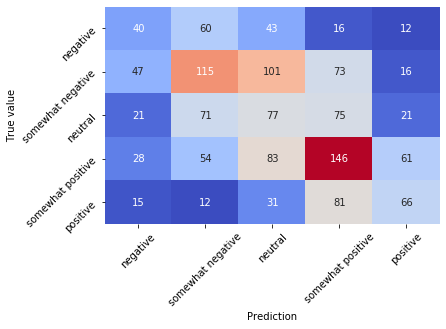


* * * Training * * *
Train Epoch:  16 [     0/  5458 (0%)]	Loss: 0.193025
Train Epoch:  16 [   640/  5458 (12%)]	Loss: 0.311585
Train Epoch:  16 [  1280/  5458 (23%)]	Loss: 0.186244
Train Epoch:  16 [  1920/  5458 (35%)]	Loss: 0.377188
Train Epoch:  16 [  2560/  5458 (47%)]	Loss: 0.287012
Train Epoch:  16 [  3200/  5458 (58%)]	Loss: 0.304465
Train Epoch:  16 [  3840/  5458 (70%)]	Loss: 0.281420
Train Epoch:  16 [  4480/  5458 (81%)]	Loss: 0.171147
Train Epoch:  16 [  5120/  5458 (93%)]	Loss: 0.374397

* * * Evaluating * * *
Test set: Average loss: 0.0262, Accuracy: 453/1365 (33.19%)



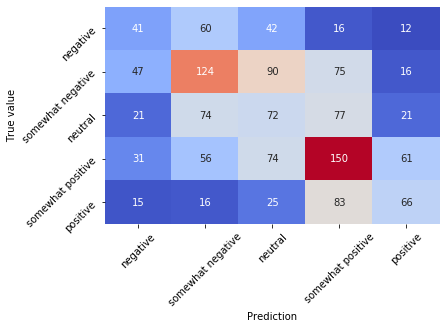


* * * Training * * *
Train Epoch:  17 [     0/  5458 (0%)]	Loss: 0.183181
Train Epoch:  17 [   640/  5458 (12%)]	Loss: 0.231052
Train Epoch:  17 [  1280/  5458 (23%)]	Loss: 0.253530
Train Epoch:  17 [  1920/  5458 (35%)]	Loss: 0.226109
Train Epoch:  17 [  2560/  5458 (47%)]	Loss: 0.318032
Train Epoch:  17 [  3200/  5458 (58%)]	Loss: 0.240318
Train Epoch:  17 [  3840/  5458 (70%)]	Loss: 0.353786
Train Epoch:  17 [  4480/  5458 (81%)]	Loss: 0.206551
Train Epoch:  17 [  5120/  5458 (93%)]	Loss: 0.222611

* * * Evaluating * * *
Test set: Average loss: 0.0266, Accuracy: 446/1365 (32.67%)



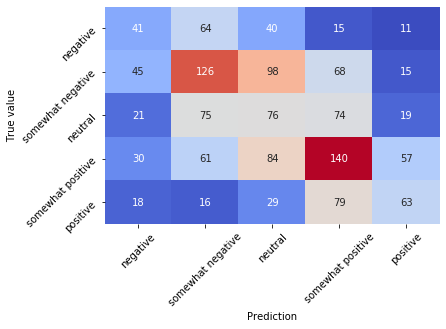


* * * Training * * *
Train Epoch:  18 [     0/  5458 (0%)]	Loss: 0.286600
Train Epoch:  18 [   640/  5458 (12%)]	Loss: 0.215642
Train Epoch:  18 [  1280/  5458 (23%)]	Loss: 0.357700
Train Epoch:  18 [  1920/  5458 (35%)]	Loss: 0.216443
Train Epoch:  18 [  2560/  5458 (47%)]	Loss: 0.251115
Train Epoch:  18 [  3200/  5458 (58%)]	Loss: 0.228317
Train Epoch:  18 [  3840/  5458 (70%)]	Loss: 0.129795
Train Epoch:  18 [  4480/  5458 (81%)]	Loss: 0.289558
Train Epoch:  18 [  5120/  5458 (93%)]	Loss: 0.173242

* * * Evaluating * * *
Test set: Average loss: 0.0273, Accuracy: 447/1365 (32.75%)



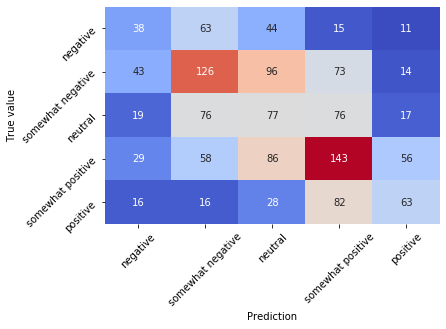


* * * Training * * *
Train Epoch:  19 [     0/  5458 (0%)]	Loss: 0.263866
Train Epoch:  19 [   640/  5458 (12%)]	Loss: 0.187220
Train Epoch:  19 [  1280/  5458 (23%)]	Loss: 0.228049
Train Epoch:  19 [  1920/  5458 (35%)]	Loss: 0.189348
Train Epoch:  19 [  2560/  5458 (47%)]	Loss: 0.199621
Train Epoch:  19 [  3200/  5458 (58%)]	Loss: 0.295575
Train Epoch:  19 [  3840/  5458 (70%)]	Loss: 0.242221
Train Epoch:  19 [  4480/  5458 (81%)]	Loss: 0.162207
Train Epoch:  19 [  5120/  5458 (93%)]	Loss: 0.206635

* * * Evaluating * * *
Test set: Average loss: 0.0280, Accuracy: 450/1365 (32.97%)



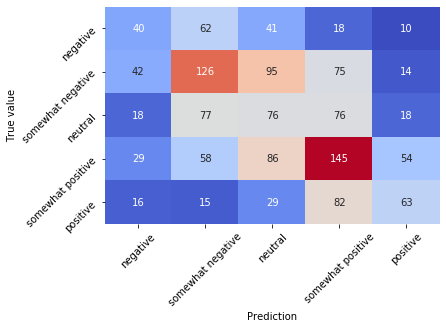


* * * Training * * *
Train Epoch:  20 [     0/  5458 (0%)]	Loss: 0.305359
Train Epoch:  20 [   640/  5458 (12%)]	Loss: 0.281248
Train Epoch:  20 [  1280/  5458 (23%)]	Loss: 0.179686
Train Epoch:  20 [  1920/  5458 (35%)]	Loss: 0.168591
Train Epoch:  20 [  2560/  5458 (47%)]	Loss: 0.229018
Train Epoch:  20 [  3200/  5458 (58%)]	Loss: 0.199812
Train Epoch:  20 [  3840/  5458 (70%)]	Loss: 0.200397
Train Epoch:  20 [  4480/  5458 (81%)]	Loss: 0.112344
Train Epoch:  20 [  5120/  5458 (93%)]	Loss: 0.169506

* * * Evaluating * * *
Test set: Average loss: 0.0285, Accuracy: 456/1365 (33.41%)



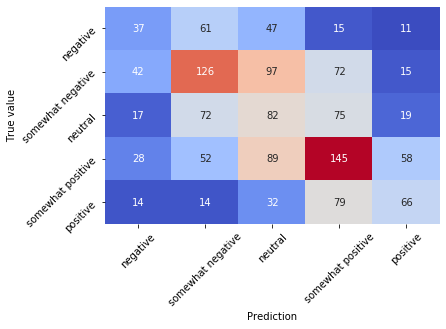


* * * Training * * *
Train Epoch:  21 [     0/  5458 (0%)]	Loss: 0.230368
Train Epoch:  21 [   640/  5458 (12%)]	Loss: 0.176308
Train Epoch:  21 [  1280/  5458 (23%)]	Loss: 0.126774
Train Epoch:  21 [  1920/  5458 (35%)]	Loss: 0.167741
Train Epoch:  21 [  2560/  5458 (47%)]	Loss: 0.165859
Train Epoch:  21 [  3200/  5458 (58%)]	Loss: 0.221337
Train Epoch:  21 [  3840/  5458 (70%)]	Loss: 0.164828
Train Epoch:  21 [  4480/  5458 (81%)]	Loss: 0.202971
Train Epoch:  21 [  5120/  5458 (93%)]	Loss: 0.108714

* * * Evaluating * * *
Test set: Average loss: 0.0286, Accuracy: 456/1365 (33.41%)



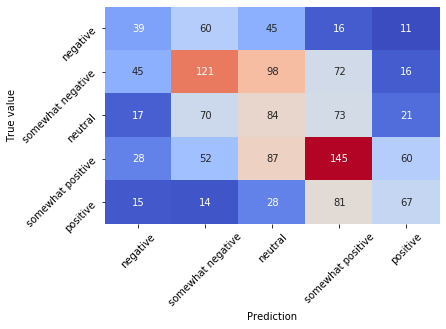


* * * Training * * *
Train Epoch:  22 [     0/  5458 (0%)]	Loss: 0.243991
Train Epoch:  22 [   640/  5458 (12%)]	Loss: 0.171886
Train Epoch:  22 [  1280/  5458 (23%)]	Loss: 0.138120
Train Epoch:  22 [  1920/  5458 (35%)]	Loss: 0.198699
Train Epoch:  22 [  2560/  5458 (47%)]	Loss: 0.232762
Train Epoch:  22 [  3200/  5458 (58%)]	Loss: 0.253441
Train Epoch:  22 [  3840/  5458 (70%)]	Loss: 0.260774
Train Epoch:  22 [  4480/  5458 (81%)]	Loss: 0.150206
Train Epoch:  22 [  5120/  5458 (93%)]	Loss: 0.249777

* * * Evaluating * * *
Test set: Average loss: 0.0287, Accuracy: 456/1365 (33.41%)



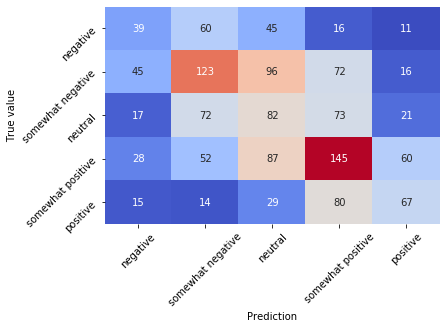


* * * Training * * *
Train Epoch:  23 [     0/  5458 (0%)]	Loss: 0.306891
Train Epoch:  23 [   640/  5458 (12%)]	Loss: 0.227533
Train Epoch:  23 [  1280/  5458 (23%)]	Loss: 0.211952
Train Epoch:  23 [  1920/  5458 (35%)]	Loss: 0.196161
Train Epoch:  23 [  2560/  5458 (47%)]	Loss: 0.225193
Train Epoch:  23 [  3200/  5458 (58%)]	Loss: 0.202694
Train Epoch:  23 [  3840/  5458 (70%)]	Loss: 0.144282
Train Epoch:  23 [  4480/  5458 (81%)]	Loss: 0.088808
Train Epoch:  23 [  5120/  5458 (93%)]	Loss: 0.218673

* * * Evaluating * * *
Test set: Average loss: 0.0288, Accuracy: 455/1365 (33.33%)



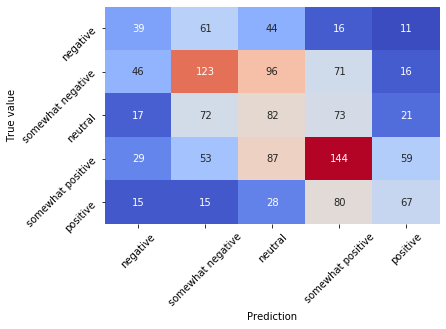


* * * Training * * *
Train Epoch:  24 [     0/  5458 (0%)]	Loss: 0.247760
Train Epoch:  24 [   640/  5458 (12%)]	Loss: 0.276426
Train Epoch:  24 [  1280/  5458 (23%)]	Loss: 0.272207
Train Epoch:  24 [  1920/  5458 (35%)]	Loss: 0.138144
Train Epoch:  24 [  2560/  5458 (47%)]	Loss: 0.173931
Train Epoch:  24 [  3200/  5458 (58%)]	Loss: 0.163349
Train Epoch:  24 [  3840/  5458 (70%)]	Loss: 0.162109
Train Epoch:  24 [  4480/  5458 (81%)]	Loss: 0.171082
Train Epoch:  24 [  5120/  5458 (93%)]	Loss: 0.190977

* * * Evaluating * * *
Test set: Average loss: 0.0288, Accuracy: 454/1365 (33.26%)



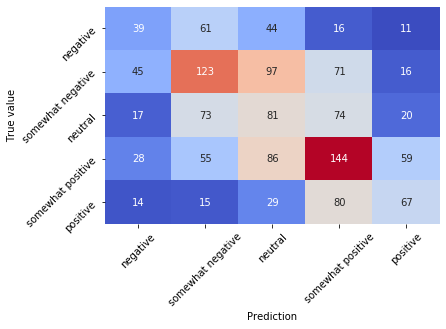


* * * Training * * *
Train Epoch:  25 [     0/  5458 (0%)]	Loss: 0.143040
Train Epoch:  25 [   640/  5458 (12%)]	Loss: 0.170721
Train Epoch:  25 [  1280/  5458 (23%)]	Loss: 0.162925
Train Epoch:  25 [  1920/  5458 (35%)]	Loss: 0.132985
Train Epoch:  25 [  2560/  5458 (47%)]	Loss: 0.231143
Train Epoch:  25 [  3200/  5458 (58%)]	Loss: 0.218671
Train Epoch:  25 [  3840/  5458 (70%)]	Loss: 0.246229
Train Epoch:  25 [  4480/  5458 (81%)]	Loss: 0.168053
Train Epoch:  25 [  5120/  5458 (93%)]	Loss: 0.208103

* * * Evaluating * * *
Test set: Average loss: 0.0289, Accuracy: 457/1365 (33.48%)



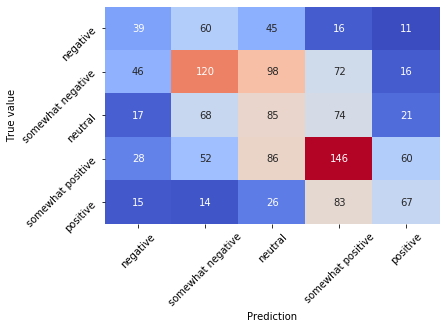


* * * Training * * *
Train Epoch:  26 [     0/  5458 (0%)]	Loss: 0.268021
Train Epoch:  26 [   640/  5458 (12%)]	Loss: 0.163769
Train Epoch:  26 [  1280/  5458 (23%)]	Loss: 0.278269
Train Epoch:  26 [  1920/  5458 (35%)]	Loss: 0.185830
Train Epoch:  26 [  2560/  5458 (47%)]	Loss: 0.166079
Train Epoch:  26 [  3200/  5458 (58%)]	Loss: 0.246344
Train Epoch:  26 [  3840/  5458 (70%)]	Loss: 0.196543
Train Epoch:  26 [  4480/  5458 (81%)]	Loss: 0.227256
Train Epoch:  26 [  5120/  5458 (93%)]	Loss: 0.128448

* * * Evaluating * * *
Test set: Average loss: 0.0290, Accuracy: 453/1365 (33.19%)



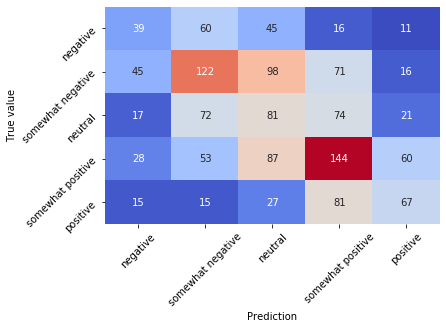


* * * Training * * *
Train Epoch:  27 [     0/  5458 (0%)]	Loss: 0.215247
Train Epoch:  27 [   640/  5458 (12%)]	Loss: 0.132438
Train Epoch:  27 [  1280/  5458 (23%)]	Loss: 0.210806
Train Epoch:  27 [  1920/  5458 (35%)]	Loss: 0.137202
Train Epoch:  27 [  2560/  5458 (47%)]	Loss: 0.157488
Train Epoch:  27 [  3200/  5458 (58%)]	Loss: 0.152538
Train Epoch:  27 [  3840/  5458 (70%)]	Loss: 0.207134
Train Epoch:  27 [  4480/  5458 (81%)]	Loss: 0.200833
Train Epoch:  27 [  5120/  5458 (93%)]	Loss: 0.180388

* * * Evaluating * * *
Test set: Average loss: 0.0291, Accuracy: 458/1365 (33.55%)



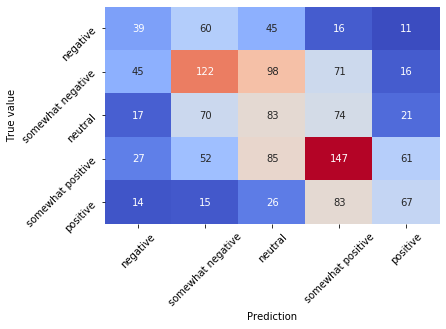


* * * Training * * *
Train Epoch:  28 [     0/  5458 (0%)]	Loss: 0.270684
Train Epoch:  28 [   640/  5458 (12%)]	Loss: 0.184276
Train Epoch:  28 [  1280/  5458 (23%)]	Loss: 0.183029
Train Epoch:  28 [  1920/  5458 (35%)]	Loss: 0.145253
Train Epoch:  28 [  2560/  5458 (47%)]	Loss: 0.245933
Train Epoch:  28 [  3200/  5458 (58%)]	Loss: 0.244824
Train Epoch:  28 [  3840/  5458 (70%)]	Loss: 0.119135
Train Epoch:  28 [  4480/  5458 (81%)]	Loss: 0.190367
Train Epoch:  28 [  5120/  5458 (93%)]	Loss: 0.200389

* * * Evaluating * * *
Test set: Average loss: 0.0291, Accuracy: 460/1365 (33.70%)



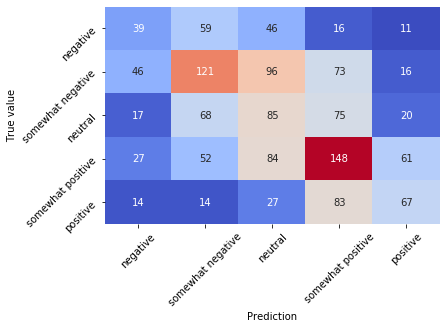


* * * Training * * *
Train Epoch:  29 [     0/  5458 (0%)]	Loss: 0.221550
Train Epoch:  29 [   640/  5458 (12%)]	Loss: 0.165542
Train Epoch:  29 [  1280/  5458 (23%)]	Loss: 0.117429
Train Epoch:  29 [  1920/  5458 (35%)]	Loss: 0.188275
Train Epoch:  29 [  2560/  5458 (47%)]	Loss: 0.101084
Train Epoch:  29 [  3200/  5458 (58%)]	Loss: 0.164440
Train Epoch:  29 [  3840/  5458 (70%)]	Loss: 0.149822
Train Epoch:  29 [  4480/  5458 (81%)]	Loss: 0.176991
Train Epoch:  29 [  5120/  5458 (93%)]	Loss: 0.191555

* * * Evaluating * * *
Test set: Average loss: 0.0292, Accuracy: 455/1365 (33.33%)



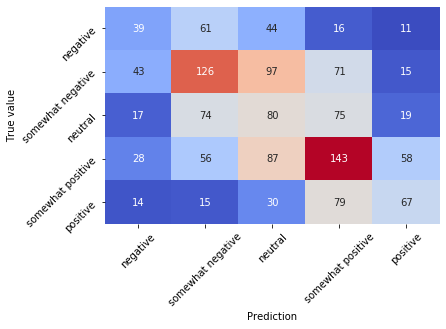


* * * Training * * *
Train Epoch:  30 [     0/  5458 (0%)]	Loss: 0.175817
Train Epoch:  30 [   640/  5458 (12%)]	Loss: 0.231817
Train Epoch:  30 [  1280/  5458 (23%)]	Loss: 0.132892
Train Epoch:  30 [  1920/  5458 (35%)]	Loss: 0.182225
Train Epoch:  30 [  2560/  5458 (47%)]	Loss: 0.148031
Train Epoch:  30 [  3200/  5458 (58%)]	Loss: 0.229813
Train Epoch:  30 [  3840/  5458 (70%)]	Loss: 0.241381
Train Epoch:  30 [  4480/  5458 (81%)]	Loss: 0.209530
Train Epoch:  30 [  5120/  5458 (93%)]	Loss: 0.369646

* * * Evaluating * * *
Test set: Average loss: 0.0293, Accuracy: 454/1365 (33.26%)



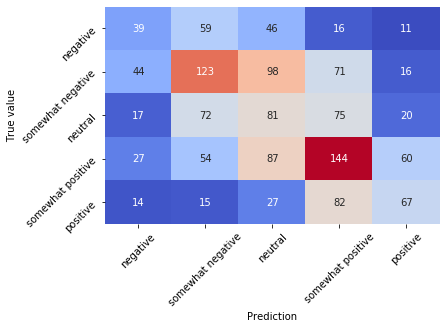


* * * Training * * *
Train Epoch:  31 [     0/  5458 (0%)]	Loss: 0.250157
Train Epoch:  31 [   640/  5458 (12%)]	Loss: 0.159218
Train Epoch:  31 [  1280/  5458 (23%)]	Loss: 0.243259
Train Epoch:  31 [  1920/  5458 (35%)]	Loss: 0.133436
Train Epoch:  31 [  2560/  5458 (47%)]	Loss: 0.164007
Train Epoch:  31 [  3200/  5458 (58%)]	Loss: 0.183457
Train Epoch:  31 [  3840/  5458 (70%)]	Loss: 0.129870
Train Epoch:  31 [  4480/  5458 (81%)]	Loss: 0.157573
Train Epoch:  31 [  5120/  5458 (93%)]	Loss: 0.207138

* * * Evaluating * * *
Test set: Average loss: 0.0293, Accuracy: 454/1365 (33.26%)



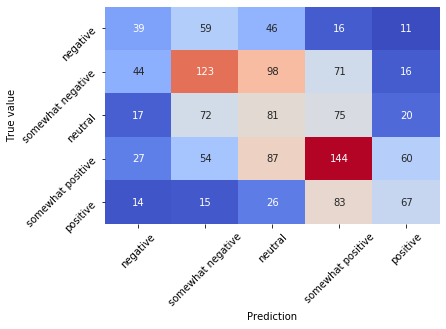


* * * Training * * *
Train Epoch:  32 [     0/  5458 (0%)]	Loss: 0.187634
Train Epoch:  32 [   640/  5458 (12%)]	Loss: 0.142998
Train Epoch:  32 [  1280/  5458 (23%)]	Loss: 0.195200
Train Epoch:  32 [  1920/  5458 (35%)]	Loss: 0.154454
Train Epoch:  32 [  2560/  5458 (47%)]	Loss: 0.125954
Train Epoch:  32 [  3200/  5458 (58%)]	Loss: 0.214363
Train Epoch:  32 [  3840/  5458 (70%)]	Loss: 0.284615
Train Epoch:  32 [  4480/  5458 (81%)]	Loss: 0.122486
Train Epoch:  32 [  5120/  5458 (93%)]	Loss: 0.155311

* * * Evaluating * * *
Test set: Average loss: 0.0293, Accuracy: 454/1365 (33.26%)



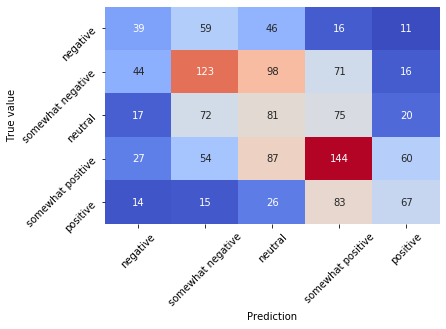


* * * Training * * *
Train Epoch:  33 [     0/  5458 (0%)]	Loss: 0.214079
Train Epoch:  33 [   640/  5458 (12%)]	Loss: 0.123035
Train Epoch:  33 [  1280/  5458 (23%)]	Loss: 0.123822
Train Epoch:  33 [  1920/  5458 (35%)]	Loss: 0.226476
Train Epoch:  33 [  2560/  5458 (47%)]	Loss: 0.204234
Train Epoch:  33 [  3200/  5458 (58%)]	Loss: 0.189931
Train Epoch:  33 [  3840/  5458 (70%)]	Loss: 0.213590
Train Epoch:  33 [  4480/  5458 (81%)]	Loss: 0.240386
Train Epoch:  33 [  5120/  5458 (93%)]	Loss: 0.111470

* * * Evaluating * * *
Test set: Average loss: 0.0293, Accuracy: 455/1365 (33.33%)



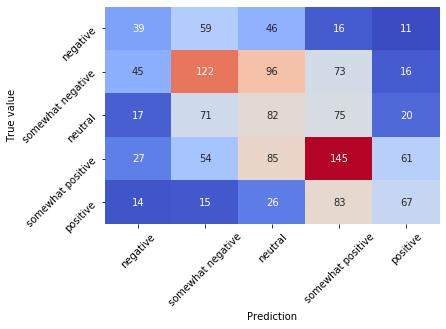


* * * Training * * *
Train Epoch:  34 [     0/  5458 (0%)]	Loss: 0.138160
Train Epoch:  34 [   640/  5458 (12%)]	Loss: 0.184112
Train Epoch:  34 [  1280/  5458 (23%)]	Loss: 0.258395
Train Epoch:  34 [  1920/  5458 (35%)]	Loss: 0.243839
Train Epoch:  34 [  2560/  5458 (47%)]	Loss: 0.199315
Train Epoch:  34 [  3200/  5458 (58%)]	Loss: 0.270546
Train Epoch:  34 [  3840/  5458 (70%)]	Loss: 0.197984
Train Epoch:  34 [  4480/  5458 (81%)]	Loss: 0.153321
Train Epoch:  34 [  5120/  5458 (93%)]	Loss: 0.328390

* * * Evaluating * * *
Test set: Average loss: 0.0293, Accuracy: 454/1365 (33.26%)



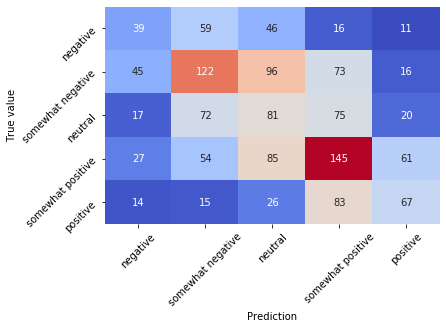


* * * Training * * *
Train Epoch:  35 [     0/  5458 (0%)]	Loss: 0.163914
Train Epoch:  35 [   640/  5458 (12%)]	Loss: 0.306403
Train Epoch:  35 [  1280/  5458 (23%)]	Loss: 0.089649
Train Epoch:  35 [  1920/  5458 (35%)]	Loss: 0.215600
Train Epoch:  35 [  2560/  5458 (47%)]	Loss: 0.112648
Train Epoch:  35 [  3200/  5458 (58%)]	Loss: 0.146417
Train Epoch:  35 [  3840/  5458 (70%)]	Loss: 0.147129
Train Epoch:  35 [  4480/  5458 (81%)]	Loss: 0.157479
Train Epoch:  35 [  5120/  5458 (93%)]	Loss: 0.161685

* * * Evaluating * * *
Test set: Average loss: 0.0293, Accuracy: 455/1365 (33.33%)



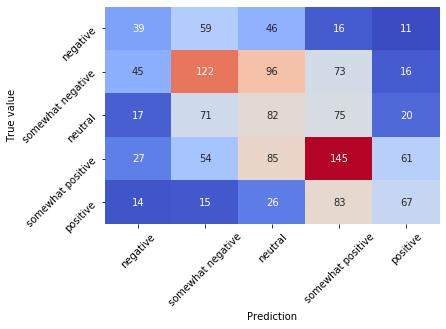


* * * Training * * *
Train Epoch:  36 [     0/  5458 (0%)]	Loss: 0.278394
Train Epoch:  36 [   640/  5458 (12%)]	Loss: 0.141245
Train Epoch:  36 [  1280/  5458 (23%)]	Loss: 0.185453
Train Epoch:  36 [  1920/  5458 (35%)]	Loss: 0.153368
Train Epoch:  36 [  2560/  5458 (47%)]	Loss: 0.140991
Train Epoch:  36 [  3200/  5458 (58%)]	Loss: 0.162963
Train Epoch:  36 [  3840/  5458 (70%)]	Loss: 0.124526
Train Epoch:  36 [  4480/  5458 (81%)]	Loss: 0.206438
Train Epoch:  36 [  5120/  5458 (93%)]	Loss: 0.108525

* * * Evaluating * * *
Test set: Average loss: 0.0293, Accuracy: 455/1365 (33.33%)



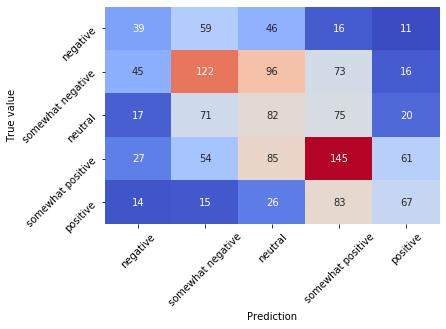


* * * Training * * *
Train Epoch:  37 [     0/  5458 (0%)]	Loss: 0.192024
Train Epoch:  37 [   640/  5458 (12%)]	Loss: 0.166825
Train Epoch:  37 [  1280/  5458 (23%)]	Loss: 0.162511
Train Epoch:  37 [  1920/  5458 (35%)]	Loss: 0.161400
Train Epoch:  37 [  2560/  5458 (47%)]	Loss: 0.148317
Train Epoch:  37 [  3200/  5458 (58%)]	Loss: 0.208899
Train Epoch:  37 [  3840/  5458 (70%)]	Loss: 0.090769
Train Epoch:  37 [  4480/  5458 (81%)]	Loss: 0.127383
Train Epoch:  37 [  5120/  5458 (93%)]	Loss: 0.183354

* * * Evaluating * * *
Test set: Average loss: 0.0293, Accuracy: 455/1365 (33.33%)



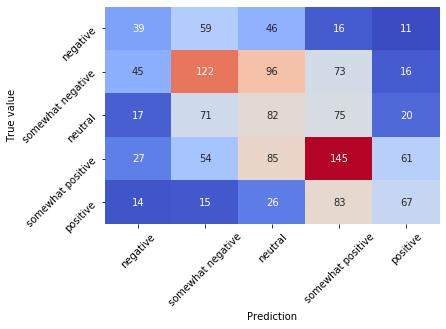


* * * Training * * *
Train Epoch:  38 [     0/  5458 (0%)]	Loss: 0.215532
Train Epoch:  38 [   640/  5458 (12%)]	Loss: 0.277492
Train Epoch:  38 [  1280/  5458 (23%)]	Loss: 0.290838
Train Epoch:  38 [  1920/  5458 (35%)]	Loss: 0.100743
Train Epoch:  38 [  2560/  5458 (47%)]	Loss: 0.226492
Train Epoch:  38 [  3200/  5458 (58%)]	Loss: 0.235919
Train Epoch:  38 [  3840/  5458 (70%)]	Loss: 0.201552
Train Epoch:  38 [  4480/  5458 (81%)]	Loss: 0.106988
Train Epoch:  38 [  5120/  5458 (93%)]	Loss: 0.150276

* * * Evaluating * * *
Test set: Average loss: 0.0293, Accuracy: 454/1365 (33.26%)



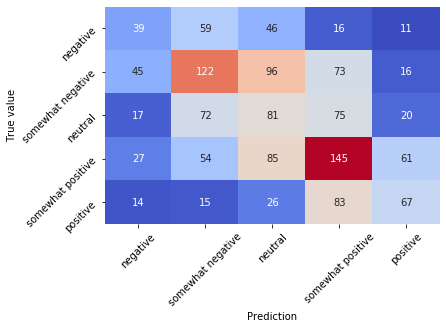


* * * Training * * *
Train Epoch:  39 [     0/  5458 (0%)]	Loss: 0.277081
Train Epoch:  39 [   640/  5458 (12%)]	Loss: 0.152074
Train Epoch:  39 [  1280/  5458 (23%)]	Loss: 0.171752
Train Epoch:  39 [  1920/  5458 (35%)]	Loss: 0.168157
Train Epoch:  39 [  2560/  5458 (47%)]	Loss: 0.160845
Train Epoch:  39 [  3200/  5458 (58%)]	Loss: 0.173034
Train Epoch:  39 [  3840/  5458 (70%)]	Loss: 0.215122
Train Epoch:  39 [  4480/  5458 (81%)]	Loss: 0.108379
Train Epoch:  39 [  5120/  5458 (93%)]	Loss: 0.210730

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 455/1365 (33.33%)



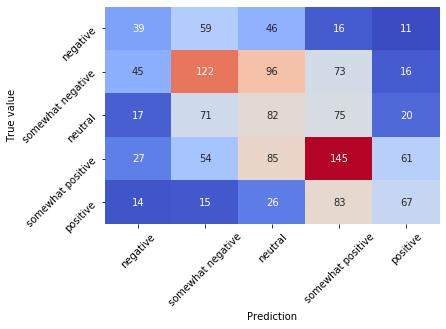


* * * Training * * *
Train Epoch:  40 [     0/  5458 (0%)]	Loss: 0.257214
Train Epoch:  40 [   640/  5458 (12%)]	Loss: 0.112586
Train Epoch:  40 [  1280/  5458 (23%)]	Loss: 0.127620
Train Epoch:  40 [  1920/  5458 (35%)]	Loss: 0.215446
Train Epoch:  40 [  2560/  5458 (47%)]	Loss: 0.229962
Train Epoch:  40 [  3200/  5458 (58%)]	Loss: 0.210919
Train Epoch:  40 [  3840/  5458 (70%)]	Loss: 0.180522
Train Epoch:  40 [  4480/  5458 (81%)]	Loss: 0.145475
Train Epoch:  40 [  5120/  5458 (93%)]	Loss: 0.305598

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 454/1365 (33.26%)



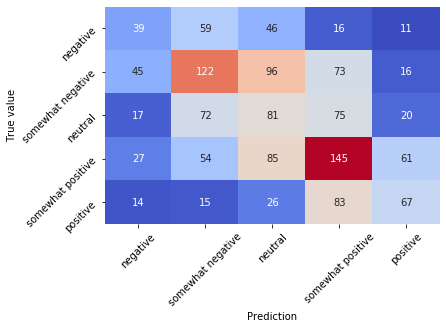


* * * Training * * *
Train Epoch:  41 [     0/  5458 (0%)]	Loss: 0.343634
Train Epoch:  41 [   640/  5458 (12%)]	Loss: 0.195839
Train Epoch:  41 [  1280/  5458 (23%)]	Loss: 0.140141
Train Epoch:  41 [  1920/  5458 (35%)]	Loss: 0.297096
Train Epoch:  41 [  2560/  5458 (47%)]	Loss: 0.213493
Train Epoch:  41 [  3200/  5458 (58%)]	Loss: 0.259714
Train Epoch:  41 [  3840/  5458 (70%)]	Loss: 0.117631
Train Epoch:  41 [  4480/  5458 (81%)]	Loss: 0.242025
Train Epoch:  41 [  5120/  5458 (93%)]	Loss: 0.201181

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 454/1365 (33.26%)



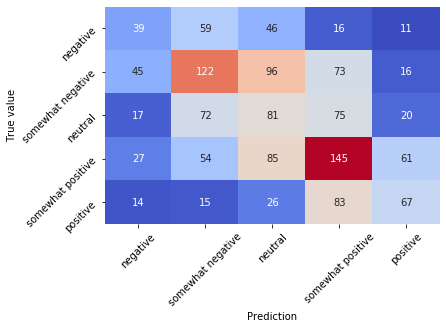


* * * Training * * *
Train Epoch:  42 [     0/  5458 (0%)]	Loss: 0.205070
Train Epoch:  42 [   640/  5458 (12%)]	Loss: 0.173057
Train Epoch:  42 [  1280/  5458 (23%)]	Loss: 0.202896
Train Epoch:  42 [  1920/  5458 (35%)]	Loss: 0.094523
Train Epoch:  42 [  2560/  5458 (47%)]	Loss: 0.199996
Train Epoch:  42 [  3200/  5458 (58%)]	Loss: 0.195970
Train Epoch:  42 [  3840/  5458 (70%)]	Loss: 0.242688
Train Epoch:  42 [  4480/  5458 (81%)]	Loss: 0.213855
Train Epoch:  42 [  5120/  5458 (93%)]	Loss: 0.199751

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 454/1365 (33.26%)



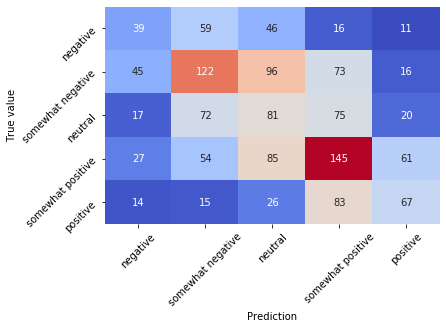


* * * Training * * *
Train Epoch:  43 [     0/  5458 (0%)]	Loss: 0.215135
Train Epoch:  43 [   640/  5458 (12%)]	Loss: 0.156385
Train Epoch:  43 [  1280/  5458 (23%)]	Loss: 0.185783
Train Epoch:  43 [  1920/  5458 (35%)]	Loss: 0.268539
Train Epoch:  43 [  2560/  5458 (47%)]	Loss: 0.159541
Train Epoch:  43 [  3200/  5458 (58%)]	Loss: 0.227799
Train Epoch:  43 [  3840/  5458 (70%)]	Loss: 0.173890
Train Epoch:  43 [  4480/  5458 (81%)]	Loss: 0.102358
Train Epoch:  43 [  5120/  5458 (93%)]	Loss: 0.280709

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 454/1365 (33.26%)



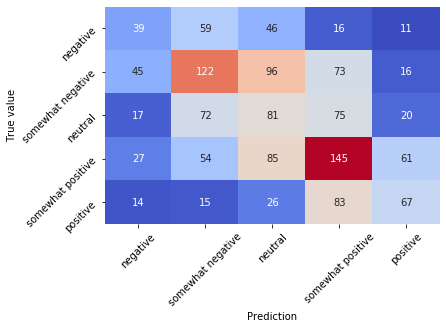


* * * Training * * *
Train Epoch:  44 [     0/  5458 (0%)]	Loss: 0.229783
Train Epoch:  44 [   640/  5458 (12%)]	Loss: 0.159617
Train Epoch:  44 [  1280/  5458 (23%)]	Loss: 0.188364
Train Epoch:  44 [  1920/  5458 (35%)]	Loss: 0.198235
Train Epoch:  44 [  2560/  5458 (47%)]	Loss: 0.187909
Train Epoch:  44 [  3200/  5458 (58%)]	Loss: 0.236031
Train Epoch:  44 [  3840/  5458 (70%)]	Loss: 0.106798
Train Epoch:  44 [  4480/  5458 (81%)]	Loss: 0.151174
Train Epoch:  44 [  5120/  5458 (93%)]	Loss: 0.132440

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 454/1365 (33.26%)



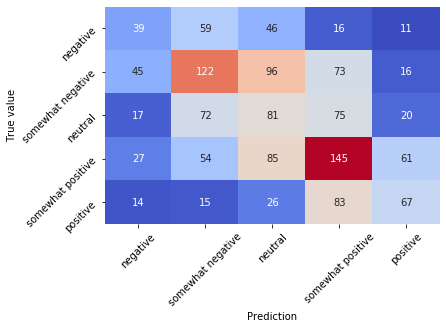


* * * Training * * *
Train Epoch:  45 [     0/  5458 (0%)]	Loss: 0.162904
Train Epoch:  45 [   640/  5458 (12%)]	Loss: 0.151797
Train Epoch:  45 [  1280/  5458 (23%)]	Loss: 0.093453
Train Epoch:  45 [  1920/  5458 (35%)]	Loss: 0.250985
Train Epoch:  45 [  2560/  5458 (47%)]	Loss: 0.238994
Train Epoch:  45 [  3200/  5458 (58%)]	Loss: 0.189832
Train Epoch:  45 [  3840/  5458 (70%)]	Loss: 0.171269
Train Epoch:  45 [  4480/  5458 (81%)]	Loss: 0.109373
Train Epoch:  45 [  5120/  5458 (93%)]	Loss: 0.304320

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 454/1365 (33.26%)



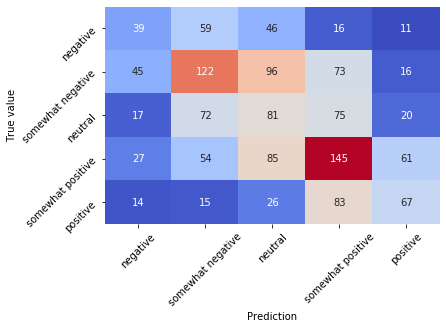


* * * Training * * *
Train Epoch:  46 [     0/  5458 (0%)]	Loss: 0.063415
Train Epoch:  46 [   640/  5458 (12%)]	Loss: 0.119019
Train Epoch:  46 [  1280/  5458 (23%)]	Loss: 0.099856
Train Epoch:  46 [  1920/  5458 (35%)]	Loss: 0.144653
Train Epoch:  46 [  2560/  5458 (47%)]	Loss: 0.082165
Train Epoch:  46 [  3200/  5458 (58%)]	Loss: 0.129697
Train Epoch:  46 [  3840/  5458 (70%)]	Loss: 0.190908
Train Epoch:  46 [  4480/  5458 (81%)]	Loss: 0.140894
Train Epoch:  46 [  5120/  5458 (93%)]	Loss: 0.177347

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 454/1365 (33.26%)



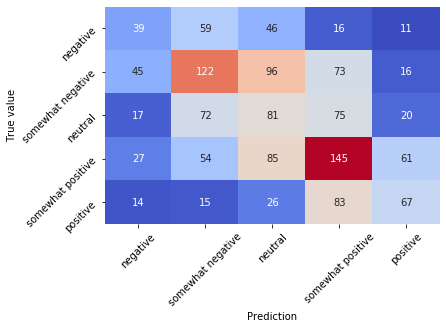


* * * Training * * *
Train Epoch:  47 [     0/  5458 (0%)]	Loss: 0.282338
Train Epoch:  47 [   640/  5458 (12%)]	Loss: 0.134341
Train Epoch:  47 [  1280/  5458 (23%)]	Loss: 0.188136
Train Epoch:  47 [  1920/  5458 (35%)]	Loss: 0.242770
Train Epoch:  47 [  2560/  5458 (47%)]	Loss: 0.198593
Train Epoch:  47 [  3200/  5458 (58%)]	Loss: 0.181710
Train Epoch:  47 [  3840/  5458 (70%)]	Loss: 0.196758
Train Epoch:  47 [  4480/  5458 (81%)]	Loss: 0.219006
Train Epoch:  47 [  5120/  5458 (93%)]	Loss: 0.183907

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 454/1365 (33.26%)



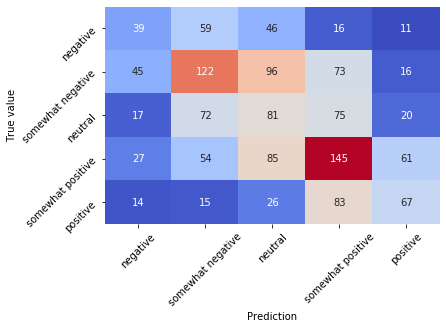


* * * Training * * *
Train Epoch:  48 [     0/  5458 (0%)]	Loss: 0.241787
Train Epoch:  48 [   640/  5458 (12%)]	Loss: 0.260274
Train Epoch:  48 [  1280/  5458 (23%)]	Loss: 0.268299
Train Epoch:  48 [  1920/  5458 (35%)]	Loss: 0.199352
Train Epoch:  48 [  2560/  5458 (47%)]	Loss: 0.182035
Train Epoch:  48 [  3200/  5458 (58%)]	Loss: 0.153859
Train Epoch:  48 [  3840/  5458 (70%)]	Loss: 0.092248
Train Epoch:  48 [  4480/  5458 (81%)]	Loss: 0.167670
Train Epoch:  48 [  5120/  5458 (93%)]	Loss: 0.244262

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 454/1365 (33.26%)



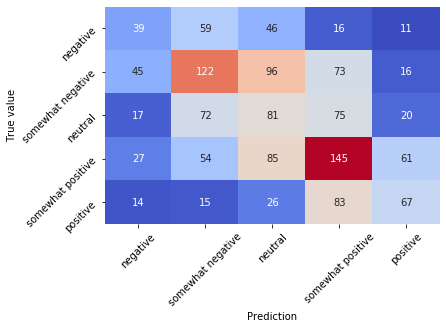


* * * Training * * *
Train Epoch:  49 [     0/  5458 (0%)]	Loss: 0.258108
Train Epoch:  49 [   640/  5458 (12%)]	Loss: 0.125452
Train Epoch:  49 [  1280/  5458 (23%)]	Loss: 0.143850
Train Epoch:  49 [  1920/  5458 (35%)]	Loss: 0.154788
Train Epoch:  49 [  2560/  5458 (47%)]	Loss: 0.146967
Train Epoch:  49 [  3200/  5458 (58%)]	Loss: 0.118969
Train Epoch:  49 [  3840/  5458 (70%)]	Loss: 0.178696
Train Epoch:  49 [  4480/  5458 (81%)]	Loss: 0.152491
Train Epoch:  49 [  5120/  5458 (93%)]	Loss: 0.101830

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 454/1365 (33.26%)



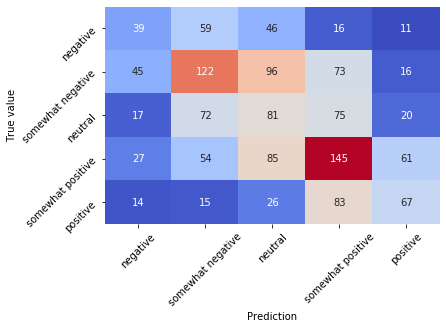


* * * Training * * *
Train Epoch:  50 [     0/  5458 (0%)]	Loss: 0.219806
Train Epoch:  50 [   640/  5458 (12%)]	Loss: 0.216707
Train Epoch:  50 [  1280/  5458 (23%)]	Loss: 0.131856
Train Epoch:  50 [  1920/  5458 (35%)]	Loss: 0.138533
Train Epoch:  50 [  2560/  5458 (47%)]	Loss: 0.214196
Train Epoch:  50 [  3200/  5458 (58%)]	Loss: 0.144330
Train Epoch:  50 [  3840/  5458 (70%)]	Loss: 0.264674
Train Epoch:  50 [  4480/  5458 (81%)]	Loss: 0.217923
Train Epoch:  50 [  5120/  5458 (93%)]	Loss: 0.174731

* * * Evaluating * * *
Test set: Average loss: 0.0294, Accuracy: 454/1365 (33.26%)



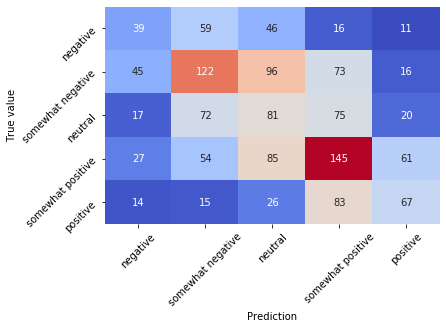

In [12]:
history = train(
    model=model, train_loader=train_loader, test_loader=valid_loader, classes=classes,
    device=device, optimizer=optimizer, lr_scheduler=lr_scheduler,
    nb_epochs=nb_epochs, log_interval=log_interval
)

### Resultados do treino

In [13]:
print('Max val acc: {:.2f}%'.format(max(history['val_acc'])))

Max val acc: 35.24%


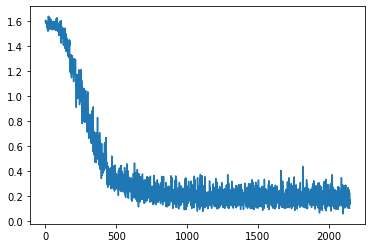

In [14]:
plt.plot(history['train_loss'])
plt.show()

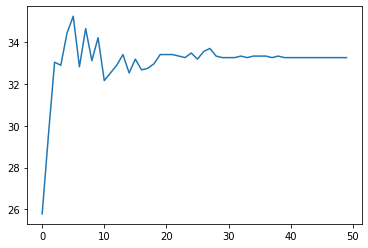

In [15]:
plt.plot(history['val_acc'])
plt.show()